# Molecular Simulations (0351-4057) Final Assignment

Yotam Gomeh - 323823971 \
Yehonatan Barda - 327569174

### Question 1

We chose to implement Path Integral Molecular Dymanics (PIMD) and Path Integral Monte Carlo (PIMC).

### Question 2

The standart Molecular Dynamics (MD) simulations that we have conducted up until now, fail to capture quantum effetcs that are wished to be described in certain simulated systems. Moreover, complex quantum systems cannot be solved analytically and are very hard to be directly simulated since it involves solving numerically a highly complex partial differential equation which holds many degrees of freedom.

### Question 3

The PIMD formalism states that when a particle evolves unobserved from point $x$ to $ x ^\prime$, the particle follows all possible path between $x$ and $x^\prime$ simultaneously and the total amplitude for the particle at $x^\prime$ at time $t$ is the sum of the amplitude associated with all possible paths between x and x′.

The amplitude of a particle that started at point x after time t at point $x^\prime$ is given by the matrix element of the propagator (in the possiton base):

$$
A= \left\langle x^\prime  \right| \hat{U} (t) \left|x\right\rangle  =\left\langle x^\prime  \right| e^{-i\mathcal{\hat{H}t/h}} \left|x\right\rangle \equiv U\left(x,x^\prime,t \right)
$$
___
For free space there are infinitely many possible paths therefore, the sum becomes an integral and the amplitued after time t at point $x^\prime$ with is:

$$
\langle x^\prime | \Psi (t) \rangle = \int dx \left\langle x^\prime  \right| e^{-i\mathcal{\hat{H}t/h}} \left|x\right\rangle \Psi (x,t=0)
$$
___
By setting $\beta= it/ \hbar$ it is clear that we can obetin the propagator from the canonical density matrix:
$$
\hat{\rho}(\beta) = \exp(-\beta \hat{\mathcal{H}}) \Rightarrow \hat{U} = \hat{\rho}(it/\hbar)
$$
____

it can be shown that the canonical density matrix elemnt is given by:

$$
\rho \left(x^\prime , x, \beta \right) \equiv \left\langle x^\prime  \right| e^{-\beta\mathcal{\hat{H}}} \left|x\right\rangle = \lim _{P \to \infty} \left(\frac{mP}{2 \pi \beta \hbar ^2}\right) ^{P/2} \int dx_2 \ldots dx_P \times \exp \left\{ -\frac{1}{\hbar} \sum_{k=1}^{P} \left[ \frac{mP}{2\beta \hbar} (x_{k+1} - x_k)^2 + \frac{\beta \hbar}{2P} \left( U(x_{k+1} + U(x_k)) \right) \right] \right\} \Bigg|^{x_{P+1} = x^\prime}_{x_1 = x}
$$
___
The canonical partion function can be caluletded (רפרנס):
$$
Z = \text{Tr}\left\{e^{-\beta\hat{\mathcal{H}}}\right\} = \lim _{P \to \infty} \left(\frac{mP}{2 \pi \beta \hbar ^2}\right) ^{P/2} \int _{D(L)} dx_1 \ldots dx_P \times \exp \left\{ -\frac{1}{\hbar} \sum_{k=1}^{P} \left[ \frac{mP}{2\beta \hbar} (x_{k+1} - x_k)^2 + \frac{\beta \hbar}{P} U(x_k) \right] \right\} \Bigg|_{x_{P+1} = x_1}
$$
which is equvilant to a system of $P \to \infty$ "beads" conected in a ring via springs with a given frequency $\omega _P \equiv \sqrt{P}/\beta\hbar$ and with external potenital $\frac{1}{P}U(x)$





The PIMD formalism takes adventage of the fact that the quantum propagator
$$
\hat{U}(t)=\exp\left(-\frac{i\hat{\mathcal{H}}t}{\hbar}\right)
$$
and the cannonical partition funtion
$$
Z=\text{Tr}\left\{e^{-\beta\hat{\mathcal{H}}}\right\}
$$
with $\beta\equiv\frac{it}{\hbar}$, the classical cannonical partition function is obtained by taking the trace of the quantum propagator.
This allows for a relativley easy mapping of quantum systems onto classical ones.
In order to obtain expectation values of the quantum system in the position basis with the PIMD method we need to calculate
$$
\langle\hat{A}\rangle=\frac{1}{Z}\text{Tr}\left\{\hat{A}e^{-\beta\hat{\mathcal{H}}}\right\}=\frac{1}{Z}\int dx\langle x|\hat{A}e^{-\beta\hat{\mathcal{H}}}|x\rangle
$$

להוסיף - חישוב ערכי תצפית
אלגוריתם סימולציה

### Question 4

Althought PIMD provides a gateway for conducting quantum simulations using classic MD, it holds several limitations:
1. Computational Cost - PIMD requires a large number of beads to accurately simulate quantum effects, especially at low temperatures. This increases the dimensionality of the system and requires significant computational resources.
2. Quantum Dynamics: PIMD is used for sampling the equilibrium properties of quantum systems, and it does not provide accurate information about the real-time quantum dynamics of particles.

### Question 5

We have no idea.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import hbar, Boltzmann

### Beads

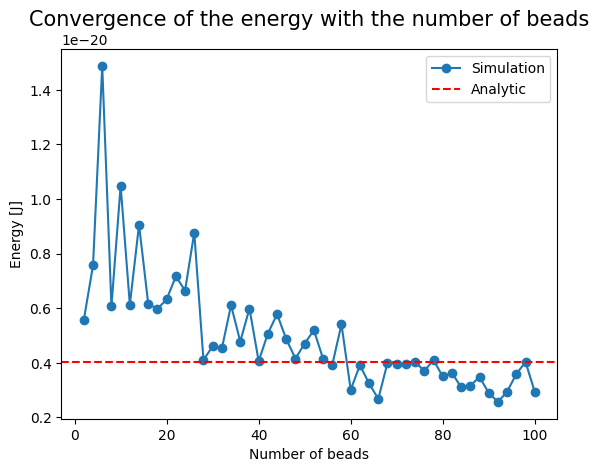

In [31]:
Nbids_list = np.arange(2, 101, 2)
trap_omega = 50 * 1.602176634E-22 / hbar # from meV to J
beta = 6 / (hbar * trap_omega)
E_list = []
E_analitic = hbar * trap_omega / 2 * 1 / np.tanh(beta * hbar * trap_omega / 2)

for Nbids in Nbids_list:
    xyz_file = "A beta = {:.1e} bids = {:}".format(beta, Nbids) + '.xyz'
    energy_file = "A beta = {:.1e} bids = {:}".format(beta, Nbids) + '.erg'
    energy_df = pd.read_csv(energy_file, sep=' ')
    energy = energy_df['E'].iloc[:]
    E_list.append(energy.mean())

plt.plot(Nbids_list, E_list, 'o-', label='Simulation')
plt.axhline(E_analitic, ls='--',color='r', label='Analytic')
plt.xlabel('Number of beads')
plt.ylabel('Energy [J]')
plt.legend()
plt.title('Convergence of the energy with the number of beads', fontsize=15)
plt.show()

In [4]:
energy = pd.read_csv('A beta = 7.5e+20 bids = 10.erg', sep = " ")
trap_omega = 50 * 1.602176634E-22 / hbar # from meV to J
beta = 6 / (hbar * trap_omega)

display(energy)
energy = energy['E'].iloc[50:]
print(np.mean(energy))
omega = 50 * 1.602176634E-22 / hbar
print(0.5 * omega * hbar)
print((hbar * omega)/(6 * Boltzmann))
E_analitic = hbar * trap_omega / 2 * 1/ np.tanh(beta * hbar * trap_omega / 2)
print('E_theo=', E_analitic)

,step,K,U,E
0,0,5.996616e-19,6.224325e-19,1.222094e-18
1,1,5.994710e-19,6.222354e-19,1.221706e-18
2,2,5.989328e-19,6.216716e-19,1.220604e-18
3,3,5.980383e-19,6.207389e-19,1.218777e-18
4,4,5.968463e-19,6.194972e-19,1.216343e-18
...,...,...,...,...
9995,9995,7.351000e-22,6.905559e-23,8.041556e-22
9996,9996,7.342805e-22,6.819712e-23,8.024777e-22
9997,9997,7.332401e-22,6.709073e-23,8.003308e-22
9998,9998,7.324032e-22,6.618654e-23,7.985898e-22


4.772129123125628e-21
4.005441585e-21
96.70431767958402
E_theo= 4.025347921970753e-21
